# Walmart Sales Forecasting Data

We are going to conduct some Exploratory Data Analysis. Pre-process the data for data modeling and apply a clustering technique for anomoly detection. 

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')



In [140]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
features = pd.read_csv('features.csv')


In [141]:
train_data = train.merge(features, on=['Store', 'Date'], how='left').merge(stores, on='Store', how='left')


In [142]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Week'] = train_data['Date'].dt.isocalendar().week



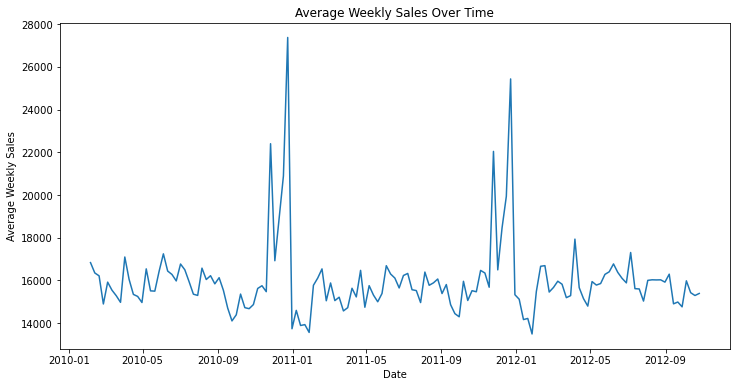

In [143]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=train_data.groupby('Date')['Weekly_Sales'].mean().reset_index())
plt.title('Average Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.show()


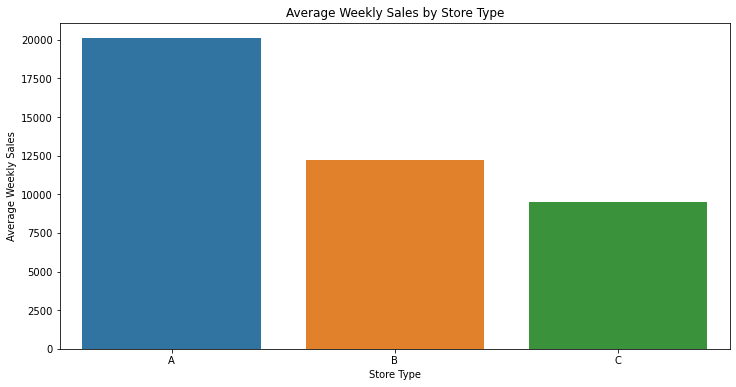

In [144]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Weekly_Sales', data=train_data.groupby('Type')['Weekly_Sales'].mean().reset_index())
plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
plt.show()


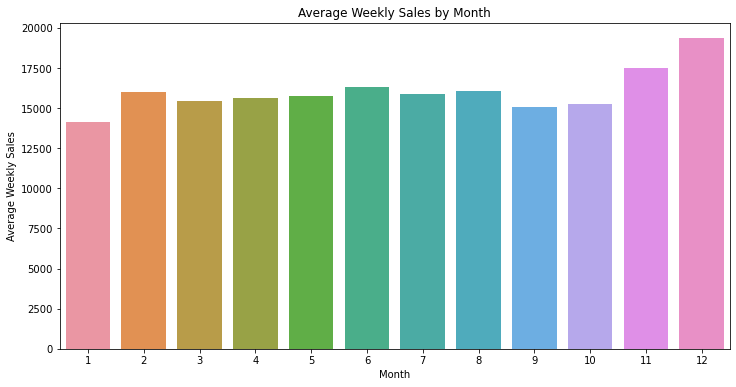

In [145]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Weekly_Sales', data=train_data.groupby('Month')['Weekly_Sales'].mean().reset_index())
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()


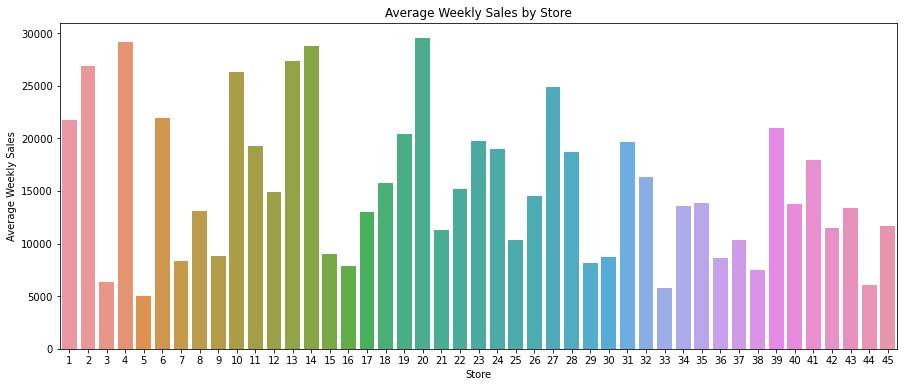

In [146]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=train_data.groupby('Store')['Weekly_Sales'].mean().reset_index())
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.show()


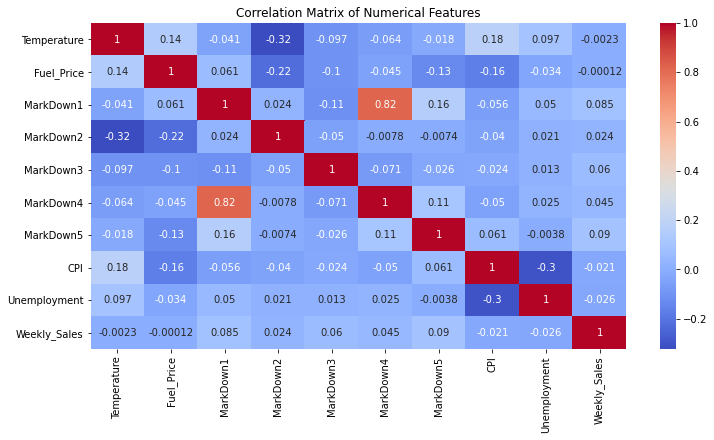

In [147]:
num_features = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales']
corr_matrix = train_data[num_features].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


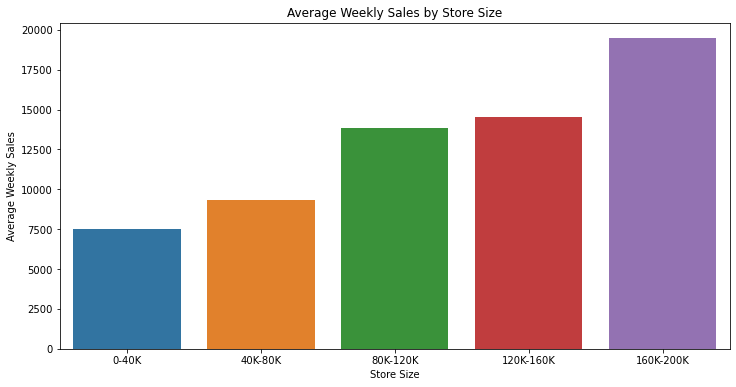

In [148]:
# Define custom bin edges and labels
bin_edges = [0, 40000, 80000, 120000, 160000, 200000]
bin_labels = ['0-40K', '40K-80K', '80K-120K', '120K-160K', '160K-200K']

# Assign the binned store sizes
train_data['Size_binned'] = pd.cut(train_data['Size'], bins=bin_edges, labels=bin_labels)

# Plot the average weekly sales by store size
plt.figure(figsize=(12, 6))
sns.barplot(x='Size_binned', y='Weekly_Sales', data=train_data.groupby('Size_binned')['Weekly_Sales'].mean().reset_index())
plt.title('Average Weekly Sales by Store Size')
plt.xlabel('Store Size')
plt.ylabel('Average Weekly Sales')
plt.show()



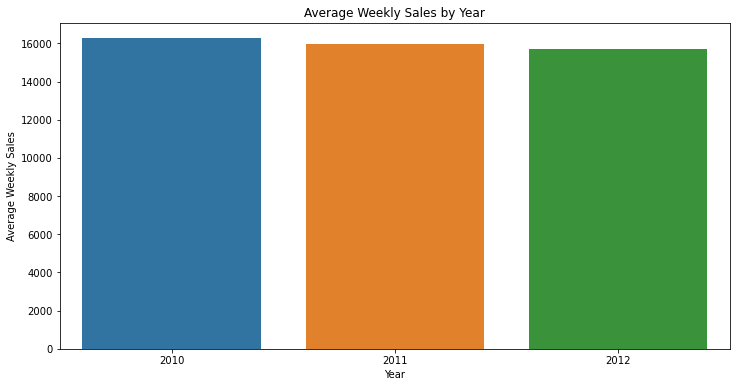

In [149]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Weekly_Sales', data=train_data.groupby('Year')['Weekly_Sales'].mean().reset_index())
plt.title('Average Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')
plt.show()


Data Modeling and preprocessing

In [108]:
print(train_data.columns)


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size',
       'Year', 'Month', 'Week', 'Size_binned'],
      dtype='object')


To improve the RMSE value, we can try various feature engineering techniques and hyperparameter tuning for the RandomForestRegressor model. Here are a few ideas:

Feature Engineering:
Maybe we can make new features, like IsHoliday multiplied by our Temperature, Unemployment multiplied by CPI, etc. This can capture interactions between features that the model may not automatically learn.
Calculate the rolling mean, rolling median, or rolling standard deviation of Weekly_Sales for each store and department, and use it as a new feature.
Feature Selection:

Use Recursive Feature Elimination (RFE) or other feature selection techniques to identify and keep only the most important features for the model.
Remove highly correlated features to reduce multicollinearity, which can help the model generalize better.
Hyperparameter Tuning:

Experiment with different hyperparameters for RandomForestRegressor, such as n_estimators, max_depth, min_samples_split, etc. We can use GridSearchCV or RandomizedSearchCV from scikit-learn to perform a more systematic search for the best parameters.

Few ideas to speed up the process:

Reduce the search space: I can reduce the number of hyperparameters Im testing in the grid search. This will reduce the total number of fits and should speed up the process.

Use RandomizedSearchCV: Instead of GridSearchCV, I can use RandomizedSearchCV, which does not perform an exhaustive search, but rather a random sampling of the hyperparameters. This can significantly reduce the computation time.

Parallelize the process: I can parallelize the grid search by setting the n_jobs parameter in GridSearchCV to -1. This will make use of all available CPU cores, potentially speeding up the process. Keep in mind that this will also increase the memory usage.

Reduce the dataset size: If my dataset is large, i can try using a smaller subset of the data for the initial hyperparameter tuning. Once you i identified the best hyperparameters, i can train the final model on the full dataset.

Consider early stopping: Some algorithms, such as gradient boosting, support early stopping. This will stop the training process if there is no significant improvement in performance after a certain number of iterations.

In [137]:
categorical_features = subset_data.select_dtypes(include=['object']).columns
print(categorical_features)


Index(['Type'], dtype='object')


In [151]:
# Check for missing values
print(subset_features.isna().sum())

# Fill missing values with the median
subset_features = subset_features.fillna(subset_features.median())

# Preprocess the subset and split it into train and test sets
subset_target = subset_data['Weekly_Sales']

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(subset_features, subset_target, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train_sub)
X_test_sub = scaler.transform(X_test_sub)

# Train the model
rf_model = RandomForestRegressor(n_estimators = 100, random_state=42)
rf_model.fit(X_train_sub, y_train_sub)

# Make predictions
y_pred_sub = rf_model.predict(X_test_sub)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test_sub, y_pred_sub)
print("Mean Absolute Error:", mae)



Store                    0
Dept                     0
IsHoliday_x              0
Temperature              0
Fuel_Price               0
MarkDown1                0
MarkDown2                0
MarkDown3                0
MarkDown4                0
MarkDown5                0
CPI                      0
Unemployment             0
IsHoliday_y              0
Size                     0
Year                     0
Month                    0
Week                     0
Size_binned_0-40K        0
Size_binned_40K-80K      0
Size_binned_80K-120K     0
Size_binned_120K-160K    0
Size_binned_160K-200K    0
Type_A                   0
Type_B                   0
Type_C                   0
dtype: int64
Mean Absolute Error: 2400.1469487428844


In [153]:
# Update the features list after one-hot encoding
features = [column for column in subset_data.columns if column != target and column != 'Date']

# Check for missing values
subset_features = subset_data[features]
print(subset_features.isna().sum())

# Fill missing values with the median
subset_features = subset_features.fillna(subset_features.median())

# Preprocess the subset and split it into train and test sets
subset_target = subset_data['Weekly_Sales']

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(subset_features, subset_target, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train_sub)
X_test_sub = scaler.transform(X_test_sub)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_sub, y_train_sub)

# Make predictions
y_pred_sub = rf_model.predict(X_test_sub)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test_sub, y_pred_sub)
print("Mean Absolute Error:", mae)


Store                        0
Dept                         0
IsHoliday_x                  0
Temperature                  0
Fuel_Price                   0
MarkDown1                26944
MarkDown2                31012
MarkDown3                28334
MarkDown4                28574
MarkDown5                26878
CPI                          0
Unemployment                 0
IsHoliday_y                  0
Size                         0
Year                         0
Month                        0
Week                         0
Size_binned_0-40K            0
Size_binned_40K-80K          0
Size_binned_80K-120K         0
Size_binned_120K-160K        0
Size_binned_160K-200K        0
Type_A                       0
Type_B                       0
Type_C                       0
dtype: int64
Mean Absolute Error: 2400.1469487428844


Whether this MAE is too high depends on how many stores I want to look at. In the case of predicting weekly sales, an error of $2,400 could be considered high for a small store but might be acceptable for a large store with high weekly sales. It is essential to compare this error metric with a baseline model. If it is not satisfactory, I might want to try other modeling techniques, feature engineering, or hyperparameter tuning to improve the model's performance.


# K-Means method to find new patterns

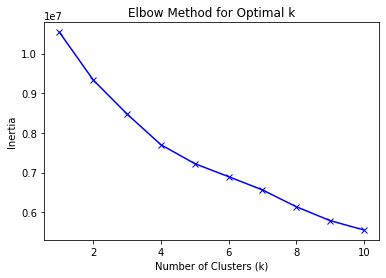

In [158]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'train_data' is the name of the full dataset
subset_data = train_data.drop(columns=['Date', 'Weekly_Sales'])

# One-hot encode the 'Type' and 'Size_binned' columns
subset_data = pd.get_dummies(subset_data, columns=['Type', 'Size_binned'])

# Fill missing values with the column mean
subset_data = subset_data.fillna(subset_data.mean())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

# Find the optimal number of clusters using the elbow method
inertia = []
num_clusters = range(1, 11)
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
import matplotlib.pyplot as plt

plt.plot(num_clusters, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal number of clusters based on the elbow curve
optimal_k = 4

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster assignments back to the original data
train_data['Cluster'] = clusters



 The elbow method is a technique used to determine the optimal number of clusters in a dataset when using k-means clustering. The idea is to find the point at which adding more clusters doesn't significantly improve the model's ability to capture the structure of the data.

The chart you see is a plot of the inertia values (y-axis) against the number of clusters (x-axis). Inertia is the sum of squared distances of samples to their nearest cluster center. A lower inertia value means that the data points within a cluster are more similar to each other, which is generally desirable.

As you increase the number of clusters (k), the inertia will decrease because the data points will be closer to their cluster centers. However, there will be a point where adding more clusters doesn't lead to a significant reduction in inertia. This point is called the "elbow" because the curve often resembles an arm with a bent elbow.

The optimal number of clusters is the one at the "elbow" point, where adding more clusters doesn't result in a significant improvement in the model's ability to capture the structure of the data. In other words, you want to find a balance between the complexity of the model (more clusters) and its ability to capture the underlying structure of the data.

In the context of this dataset, using the elbow method helps us understand the natural groupings within the data. These groupings may reveal hidden patterns or structures in the data that can be useful for further analysis or decision-making. By choosing the optimal number of clusters, we can create a more interpretable model that captures the most important characteristics of the data without overfitting to noise.







# K-Nearest Neighbors - (KNNs) - Other approaches

K-nearest neighbors (KNN) is a versatile algorithm that can be used for both classification and regression tasks. In the context of our dataset, which contains information about store sales, there are several ways we can apply KNN:

1. Sales prediction: We can use KNN as a regression algorithm to predict weekly sales for a given store and department based on the features in the dataset. To do this, we will need to split the dataset into training and testing sets, normalize the features, and then train the KNN model to predict the target variable (weekly sales) using the selected features.

2. Store type classification: If we want to classify stores into their types (A, B, C) based on their features (e.g., size, department sales, etc.), we can use KNN as a classification algorithm. We will need to extract relevant features, normalize the data, and then train the KNN classifier to predict the store type.

3. Anomaly detection: We can use KNN for anomaly detection to identify unusual sales patterns or outliers in the dataset. By calculating the distance between a data point and its nearest neighbors, we can identify points that are significantly different from their neighbors, which may indicate an unusual event, such as a promotion, holiday, or data entry error.

4. Imputing missing values: If our dataset has missing values, we can use KNN to estimate the missing values based on the values of their nearest neighbors. KNN imputation calculates the average value of the k-nearest neighbors for the missing data point, assuming that similar data points have similar values.

We need to remember that KNN is sensitive to the scale of the features, so it's important to normalize or standardize the data before applying the algorithm. Also, choosing the right value for 'k' (the number of neighbors to consider) is crucial for the algorithm's performance. We can use cross-validation to find the optimal 'k' value that provides the best results for our specific task.

In [160]:
#Import necessary libraries:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


In [161]:
# Select the relevant features for anomaly detection
anomaly_data = train_data[['Store', 'Dept', 'Weekly_Sales', 'Size']]

# Remove rows with missing values if any
anomaly_data = anomaly_data.dropna()

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(anomaly_data)


In [162]:
# Set the number of neighbors
k = 5

# Train the KNN model
knn = NearestNeighbors(n_neighbors=k)
knn.fit(scaled_data)


NearestNeighbors()

In [163]:
distances, indices = knn.kneighbors(scaled_data)


In [164]:
# Calculate the mean distance of each point to its k nearest neighbors
anomaly_scores = distances.mean(axis=1)

# Normalize the anomaly scores
anomaly_scores_normalized = (anomaly_scores - np.mean(anomaly_scores)) / np.std(anomaly_scores)


In [165]:
threshold = np.percentile(anomaly_scores_normalized, 95)


In [166]:
# Find the indices of the anomalies
anomalies_indices = np.where(anomaly_scores_normalized > threshold)

# Extract the anomaly data points
anomalies = anomaly_data.iloc[anomalies_indices]

print("Anomalies:")
print(anomalies)


Anomalies:
        Store  Dept  Weekly_Sales    Size
0           1     1      24924.50  151315
1           1     1      46039.49  151315
7           1     1      26229.21  151315
8           1     1      57258.43  151315
9           1     1      42960.91  151315
...       ...   ...           ...     ...
421246     45    95      42084.36  118221
421273     45    95      62606.75  118221
421290     45    96          3.00  118221
421291     45    96          2.94  118221
421373     45    97       8765.09  118221

[21079 rows x 4 columns]


In [167]:
total_records = train_data.shape[0]


In [168]:
anomalies_count = 21079
proportion_of_anomalies = (anomalies_count / total_records) * 100


In [169]:
total_records = train_data.shape[0]
anomalies_count = 21079
proportion_of_anomalies = (anomalies_count / total_records) * 100

print("Total records:", total_records)
print("Number of anomalies:", anomalies_count)
print("Proportion of anomalies: {:.2f}%".format(proportion_of_anomalies))


Total records: 421570
Number of anomalies: 21079
Proportion of anomalies: 5.00%


To further investigate the anomalies, we can analyze the distribution of the anomalous records across different variables like store, department, month, or year. This can provide insights into any patterns or trends in the anomalies. Here's an example of how we can analyze anomalies by department:

Analyze the distribution of anomalies by department:

In [170]:
anomalies_by_dept = anomalies.groupby('Dept')['Weekly_Sales'].count().reset_index()
anomalies_by_dept.columns = ['Dept', 'Anomaly_Count']
print(anomalies_by_dept.sort_values(by='Anomaly_Count', ascending=False))


    Dept  Anomaly_Count
57    72           1380
14    16           1087
70    92           1082
0      1            961
6      7            906
..   ...            ...
53    60              6
41    43              6
37    39              3
26    28              2
47    50              2

[78 rows x 2 columns]


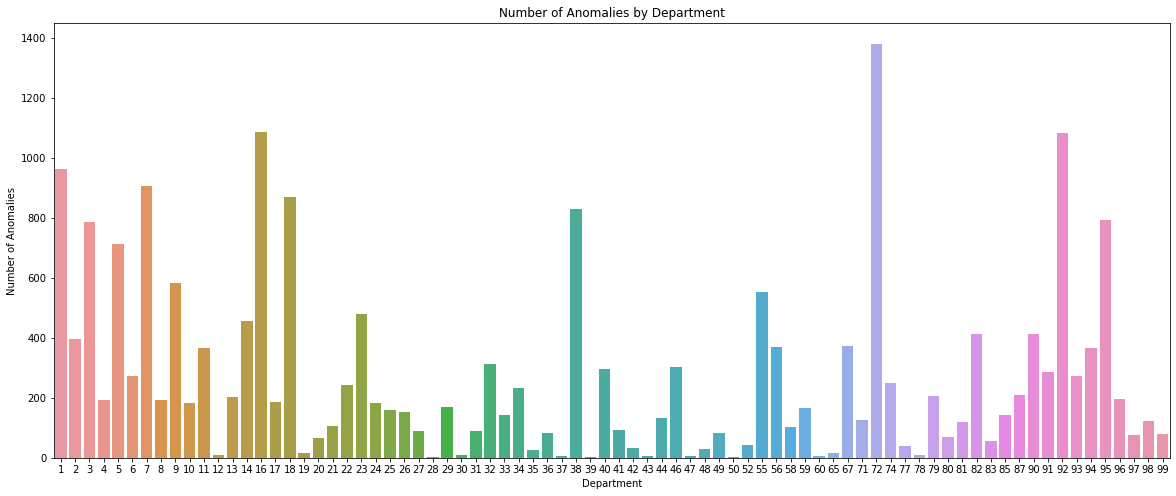

In [175]:
plt.figure(figsize=(20, 8))
sns.barplot(x='Dept', y='Anomaly_Count', data=anomalies_by_dept)
plt.xlabel('Department')
plt.ylabel('Number of Anomalies')
plt.title('Number of Anomalies by Department')
plt.show()


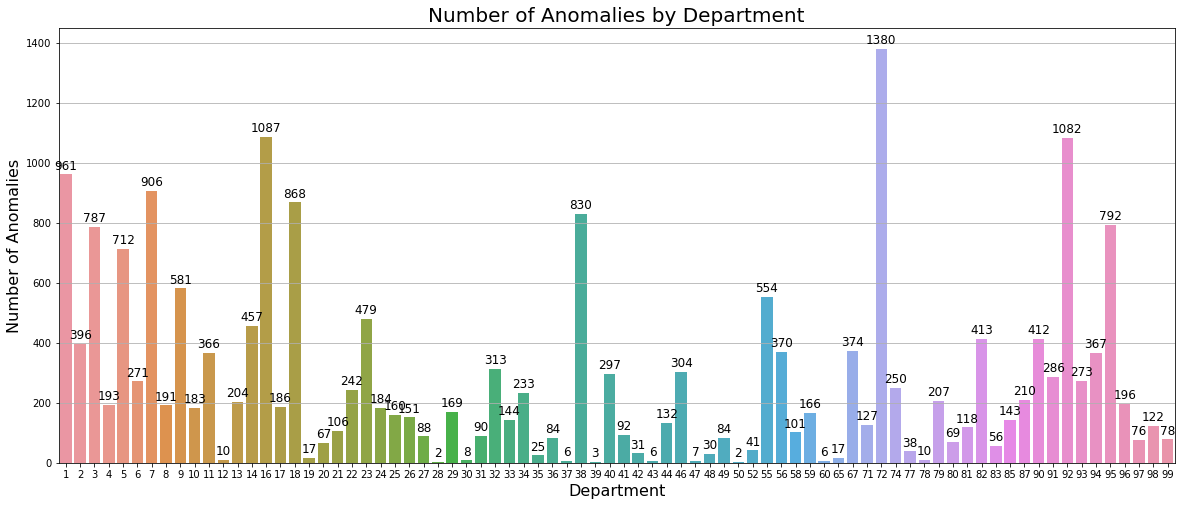

In [174]:
# Sort the data by Anomaly_Count
anomalies_by_dept_sorted = anomalies_by_dept.sort_values(by='Anomaly_Count', ascending=False)

plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Dept', y='Anomaly_Count', data=anomalies_by_dept_sorted)

# Add horizontal gridlines
ax.yaxis.grid(True)

# Increase the font size of axis labels and title
plt.xlabel('Department', fontsize=16)
plt.ylabel('Number of Anomalies', fontsize=16)
plt.title('Number of Anomalies by Department', fontsize=20)

# Display the actual anomaly count above each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [172]:
sorted_anomalies = anomalies.sort_values(by='Weekly_Sales', key=lambda x: x.abs(), ascending=False)
print(sorted_anomalies.head(20))


        Store  Dept  Weekly_Sales    Size
95373      10    72     693099.36  126512
338013     35    72     649770.18  103681
95425      10    72     630999.19  126512
337961     35    72     627962.93  103681
135665     14    72     474330.10  200898
195088     20    72     422306.25  203742
264390     27    72     420586.57  204184
88428      10     7     406988.63  126512
95377      10    72     404245.03  126512
214432     22    72     393705.20  119557
195140     20    72     392023.02  203742
37253       4    72     385051.04  205863
37201       4    72     381072.11  205863
135717     14    72     375948.31  200898
224411     23    72     369830.98  114533
264442     27    72     368484.19  204184
115274     12    72     360140.66  112238
115222     12    72     359995.60  112238
128984     14     7     356867.25  200898
274509     28    72     355356.39  206302


To better understand these anomalies, we may want to investigate the characteristics of the stores and departments involved, as well as any external factors that may have influenced sales during the time periods in which these anomalies occurred.

In [176]:
# Assuming 'anomalies' is the DataFrame containing the anomalies
store_counts = anomalies['Store'].value_counts()
dept_counts = anomalies['Dept'].value_counts()

print("Store counts:\n", store_counts)
print("Department counts:\n", dept_counts)


Store counts:
 14    1026
20     987
13     885
27     836
23     808
4      780
2      765
10     765
6      690
19     672
28     636
1      631
18     625
35     594
24     592
39     587
41     570
22     550
17     529
32     492
11     488
31     438
45     428
12     421
40     417
15     401
34     399
8      396
7      389
25     375
16     375
26     374
21     357
29     319
9      273
3      223
5      167
43     149
37     119
36     115
42     112
38      99
30      89
33      76
44      60
Name: Store, dtype: int64
Department counts:
 72    1380
16    1087
92    1082
1      961
7      906
      ... 
37       6
60       6
39       3
50       2
28       2
Name: Dept, Length: 78, dtype: int64


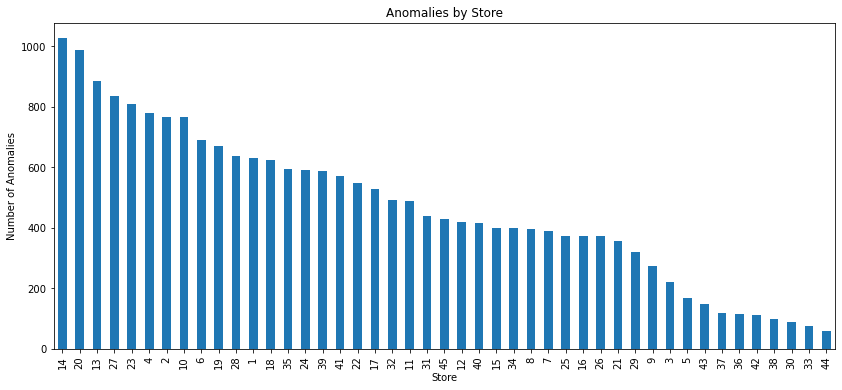

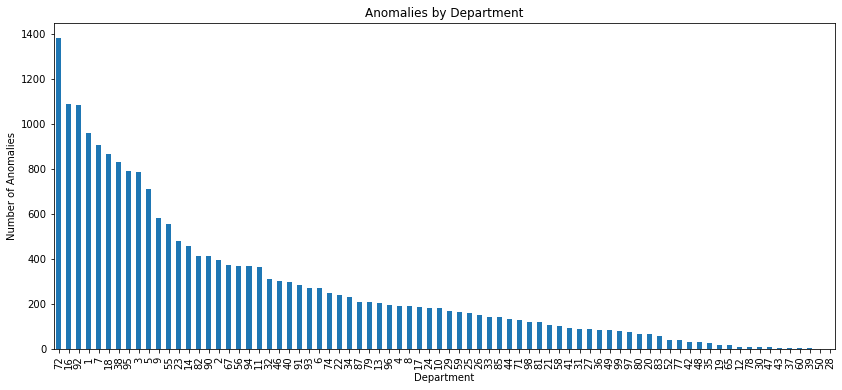

In [178]:
store_counts.plot(kind='bar', figsize=(14, 6))
plt.title("Anomalies by Store")
plt.xlabel("Store")
plt.ylabel("Number of Anomalies")
plt.show()

dept_counts.plot(kind='bar', figsize=(14, 6))
plt.title("Anomalies by Department")
plt.xlabel("Department")
plt.ylabel("Number of Anomalies")
plt.show()


We can see which stores have the highest anomolies now it should be easy to detect anomolies and their commonalities.

# Now we want to change gears and do some sales prediction :)


ARIMA (Autoregressive Integrated Moving Average) and LSTM (Long Short-Term Memory) models are widely used for time series forecasting. ARIMA is a linear model, while LSTM is a type of recurrent neural network that can capture complex, non-linear patterns in time series data

In [179]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [180]:
# Assuming you have a dataframe 'train_data' with 'Weekly_Sales' and 'Date' columns
sales_data = train_data[['Date', 'Weekly_Sales']].groupby('Date').sum().reset_index()
sales_data.set_index('Date', inplace=True)


In [181]:
train = sales_data[:-52]  # Use the last 52 weeks as test data
test = sales_data[-52:]


In [187]:
#we want to remove the warnings as we are aware of the inffered frequency. W-Fri being used. 
import warnings
from pandas.core.common import SettingWithCopyWarning
from statsmodels.tools.sm_exceptions import ValueWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=ValueWarning)



In [188]:
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

In [189]:
predictions = model_fit.forecast(steps=52)
error = mean_squared_error(test, predictions)
print('Test Mean Squared Error: %.3f' % error)


Test Mean Squared Error: 39007469889546.727


This is way too high so were going to look at whats causing such a high MSE

In [190]:
import itertools
import numpy as np
from sklearn.metrics import mean_squared_error

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

best_mse = np.inf
best_params = None

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))[0]
        mse = mean_squared_error(test, predictions)

        if mse < best_mse:
            best_mse = mse
            best_params = param
    except:
        continue

print(f"Best parameters: {best_params}")
print(f"Best Mean Squared Error: {best_mse}")


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Best parameters: None
Best Mean Squared Error: inf


In [191]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model with seasonal_order=(P, D, Q, S)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Calculate the Mean Squared Error
mse = mean_squared_error(test, predictions)
print(f"Test Mean Squared Error: {mse}")


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Test Mean Squared Error: 821021511631296.0


In [192]:
from pmdarima.arima import auto_arima

# Find the best SARIMA model
best_model = auto_arima(train, seasonal=True, stepwise=True, suppress_warnings=True, trace=True, m=52)

# Print the best model's parameters
print(best_model.summary())

# Make predictions
predictions = best_model.predict(n_periods=len(test))

# Calculate the Mean Squared Error
mse = mean_squared_error(test, predictions)
print(f"Test Mean Squared Error: {mse}")


ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject